<a href="https://colab.research.google.com/github/SharovarovAleksandr/Academy/blob/main/Diplom1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from prophet import Prophet
import holidays
from holidays.financial import european_central_bank
import matplotlib.pyplot as plt


In [123]:
def split_data(df, mark, start_test,end_test, predict_num):
    train=pd.DataFrame()
    test=pd.DataFrame()
    start_test=pd.to_datetime(start_test)
    end_test=pd.to_datetime(end_test)
    if start_test>=end_test :
        print('Error:  <end_test> go ahead of the <start_test>!')
        return None, None
    if (isinstance(df['time'][0], str)):
        df['time']=pd.to_datetime(df['time'])
    if end_test >  df['time'].iloc[-predict_num]:
        end_test=df['time'].iloc[-predict_num]
        print('Warning : <end_test> changed your date!')
    if start_test>=df['time'][len(df)-predict_num] or start_test<df['time'][0] :
        print('Error: <start_test> date of start is out of range DataFrame! ')
        return None, None
    if (predict_num>len(df)/2):
        print('Warning : <predict_num> too long period for pridiction')
    start_index=0
    end_index=0
    for i in range(len(df)):
        if start_test<=df['time'][i]:
            start_index=i
            break
    for i in range(len(df)):
        if end_test<=df['time'][i]:
            end_index=i
            break
    test['ds']=df['time'][end_index-predict_num+1:end_index+1]
    test['y']= df[mark][end_index-predict_num+1:end_index+1]
    test=test.reset_index(drop=True)
    train['ds']=df['time'][start_index:end_index-predict_num+1]    
    train['y']=df[mark][start_index:end_index-predict_num+1] 
    train=train.reset_index(drop=True)
    return train, test

def holidays_tab(ticker, start_test, lower_window, upper_window): 
    import holidays
    end=(pd.to_datetime(df['time'][len(df)-1])).year
    start=(pd.to_datetime(start_test)).year
    list_year=[]
    for i in range(start,end+1):
      list_year.append(i)
    if ticker=='CA':
        canada_holidays = holidays.Canada(years=list_year, observed=True)
        df_holidays_ca = pd.DataFrame(canada_holidays.items(), columns=['Date', 'Holiday'])
        holidays_res = pd.DataFrame({'holiday': 'Canada holidays',
                                    'ds': pd.to_datetime(df_holidays_ca['Date']),
                                    'lower_window': lower_window,
                                    'upper_window': upper_window })

    elif ticker=='US':
        us_holidays = holidays.USA(years=list_year, observed=True)
        df_holidays_us = pd.DataFrame(us_holidays.items(), columns=['Date', 'Holiday'])
        holidays_res = pd.DataFrame({'holiday': 'USA holidays',
                                    'ds': pd.to_datetime(df_holidays_us['Date']),
                                    'lower_window': lower_window,
                                    'upper_window': upper_window })
    elif ticker=='GB':
        gb_holidays=holidays.GB(years=list_year, observed=True)
        df_holidays_gb = pd.DataFrame(gb_holidays.items(), columns=['Date', 'Holiday'])
        holidays_res = pd.DataFrame({'holiday': 'Great Britan holidays',
                                    'ds': pd.to_datetime(df_holidays_gb['Date']),
                                    'lower_window': lower_window,
                                    'upper_window': upper_window })

    elif ticker=='ECB':
        eur_holidays=holidays.ECB(years=list_year, observed=True)
        df_holidays_ecb = pd.DataFrame(eur_holidays.items(), columns=['Date', 'Holiday'])
        holidays_res = pd.DataFrame({'holiday': 'European Central Bank holidays',
                                    'ds': pd.to_datetime(df_holidays_ecb['Date']),
                                    'lower_window': lower_window,
                                    'upper_window': upper_window })
    elif ticker=='NYSE':
        us_holidays_bank=holidays.NYSE(years=list_year, observed=True)
        df_holidays_nyse = pd.DataFrame(us_holidays_bank.items(), columns=['Date', 'Holiday'])
        holidays_res = pd.DataFrame({'holiday': 'NYSE holidays',
                                    'ds': pd.to_datetime(df_holidays_nyse['Date']),
                                    'lower_window': lower_window,
                                    'upper_window': upper_window })
    else :
      print('Sorry, I don`t now holidays ',ticker)
      return None
    return holidays_res

def concat_holiday(*args):
    return pd.concat((args))

def MovingAvarage(df, mark, window=15):
    rolling_mean = df.loc[:, ['time', mark]].copy()
    rolling_mean[mark] = rolling_mean[mark].rolling(window=window).mean()
    rolling_mean=rolling_mean[window:].reset_index(drop=True)
    return rolling_mean  

def all_day_holiday(df, mark, start_test, end_test, window=True, lower_window=0, upper_window=0 ):
    start=pd.to_datetime(start_test)
    end=pd.to_datetime(end_test)
    if start_test>=end_test :
        print('Error:  <end_test> go ahead of the <start_test>!')
        return None, None
    if (isinstance(df['time'][0], str)):
        df['time']=pd.to_datetime(df['time'])
    delta=end-start
    num_date=delta.days+1
    for i in range(len(df)):
        if start<=df['time'][i]:
            start_index=i
            break
    for i in range(len(df)):
        if end<=df['time'][i]:
            end_index=i
            break
    nm=num_date-(end_index-start_index)-1
    result=pd.DataFrame(columns=['holiday', 'ds'],index=pd.RangeIndex(nm))
    j=0
    k=0
    for i in range(num_date):
        cur_date=start+timedelta(days=i)
        if cur_date == df['time'][start_index+j]:
            j+=1
        else:
            result['ds'][k]=cur_date.date()
            k+=1
    result['holiday']='All_day_holiday'
    if window:
        result['lower_window']=lower_window
        result['upper_window']=upper_window
    return result

def ideal_absolut(df, mark, start, end):
    start=pd.to_datetime(start_test)
    end=pd.to_datetime(end_test)
    if start_test>=end_test :
        print('Error:  <end_test> go ahead of the <start_test>!')
        return None, None
    if (isinstance(df['time'][0], str)):
        df['time']=pd.to_datetime(df['time'])
    start_index=0
    end_index=0
    for i in range(len(df)):
        if start<=df['time'][i]:
            start_index=i
            break
    for i in range(len(df)):
        if end<=df['time'][i]:
            end_index=i
            break
    num_date=end_index-start_index+1
    result=pd.DataFrame(columns=['ds', 'y'], index=pd.RangeIndex(num_date))
    past_date = end - timedelta(days=num_date-1)
    for i in range(num_date+1):
        result['ds'][i]=past_date+timedelta(days=i)
    result['y']=df[mark][start_index:end_index+1].values
    return result  

In [116]:
df=pd.read_csv('/content/drive/MyDrive/Python/Data/GBPCAD_D1.csv', delimiter=';')
df

,time,open,high,low,close
0,2004.03.12 00:00:00,2.38770,2.40920,2.36490,2.40410
1,2004.03.15 00:00:00,2.39740,2.41590,2.38810,2.40710
2,2004.03.16 00:00:00,2.40690,2.42110,2.40020,2.41460
3,2004.03.17 00:00:00,2.41490,2.43560,2.40620,2.43000
4,2004.03.18 00:00:00,2.43030,2.44640,2.42620,2.43460
...,...,...,...,...,...
5136,2023.03.13 00:00:00,1.66923,1.67418,1.66029,1.67270
5137,2023.03.14 00:00:00,1.67178,1.67350,1.65919,1.66338
5138,2023.03.15 00:00:00,1.66334,1.66624,1.65695,1.65975
5139,2023.03.16 00:00:00,1.65899,1.66705,1.65370,1.66144


In [89]:
mark='high'
start_test = '2023-02-06'
end_test = '2023-03-15'
predict_num = 3
train,test = split_data(df, mark, start_test, end_test, predict_num)


In [73]:
def ideal_absolut(df, mark, start, end):
    start=pd.to_datetime(start_test)
    end=pd.to_datetime(end_test)
    if start_test>=end_test :
        print('Error:  <end_test> go ahead of the <start_test>!')
        return None, None
    if (isinstance(df['time'][0], str)):
        df['time']=pd.to_datetime(df['time'])
    start_index=0
    end_index=0
    for i in range(len(df)):
        if start<=df['time'][i]:
            start_index=i
            break
    for i in range(len(df)):
        if end<=df['time'][i]:
            end_index=i
            break
    num_date=end_index-start_index+1
    result=pd.DataFrame(columns=['ds', 'y'], index=pd.RangeIndex(num_date))
    past_date = end - timedelta(days=num_date-1)
    for i in range(num_date+1):
        result['ds'][i]=past_date+timedelta(days=i)
    result['y']=df[mark][start_index:end_index+1].values
    return result   


In [74]:
print(ideal_absolut(df, mark, start_test, end_test))

                    ds        y
0  2023-03-08 00:00:00  1.63959
1  2023-03-09 00:00:00  1.64223
2  2023-03-10 00:00:00  1.63527
3  2023-03-11 00:00:00  1.64934
4  2023-03-12 00:00:00  1.67061
5  2023-03-13 00:00:00  1.67418
6  2023-03-14 00:00:00  1.67350
7  2023-03-15 00:00:00  1.66624


In [121]:
def all_day_holiday(df, mark, start_test, end_test, window=True, lower_window=0, upper_window=0 ):
    start=pd.to_datetime(start_test)
    end=pd.to_datetime(end_test)
    if start_test>=end_test :
        print('Error:  <end_test> go ahead of the <start_test>!')
        return None, None
    if (isinstance(df['time'][0], str)):
        df['time']=pd.to_datetime(df['time'])
    delta=end-start
    num_date=delta.days+1
    for i in range(len(df)):
        if start<=df['time'][i]:
            start_index=i
            break
    for i in range(len(df)):
        if end<=df['time'][i]:
            end_index=i
            break
    nm=num_date-(end_index-start_index)-1
    result=pd.DataFrame(columns=['holiday', 'ds'],index=pd.RangeIndex(nm))
    j=0
    k=0
    for i in range(num_date):
        cur_date=start+timedelta(days=i)
        if cur_date == df['time'][start_index+j]:
            j+=1
        else:
            result['ds'][k]=cur_date.date()
            k+=1
    result['holiday']='All_day_holiday'
    if window:
        result['lower_window']=lower_window
        result['upper_window']=upper_window
    return result



In [124]:
print(all_day_holiday(df, mark, start_test, end_test, window=False))

           holiday          ds
0  All_day_holiday  2023-02-11
1  All_day_holiday  2023-02-12
2  All_day_holiday  2023-02-18
3  All_day_holiday  2023-02-19
4  All_day_holiday  2023-02-25
5  All_day_holiday  2023-02-26
6  All_day_holiday  2023-03-04
7  All_day_holiday  2023-03-05
8  All_day_holiday  2023-03-11
9  All_day_holiday  2023-03-12


In [ ]:
# holiday1=holidays_tab('ECB', start_test, 0, 0)
holiday=holidays_tab('NYSE', start_test, 0, 0)
# holiday3=holidays_tab('GB', start_test, 0, 0)
# holiday=concat_holiday(holiday1,holiday2,holiday3)
print(holiday)

         holiday         ds  lower_window  upper_window
0  NYSE holidays 2023-01-02             0             0
1  NYSE holidays 2023-01-16             0             0
2  NYSE holidays 2023-02-20             0             0
3  NYSE holidays 2023-04-07             0             0
4  NYSE holidays 2023-05-29             0             0
5  NYSE holidays 2023-06-19             0             0
6  NYSE holidays 2023-07-04             0             0
7  NYSE holidays 2023-09-04             0             0
8  NYSE holidays 2023-11-23             0             0
9  NYSE holidays 2023-12-25             0             0


In [ ]:
print(MovingAvarage(df,mark))

                     time       low
0     2004.04.02 00:00:00  2.405740
1     2004.04.05 00:00:00  2.405107
2     2004.04.06 00:00:00  2.404067
3     2004.04.07 00:00:00  2.403487
4     2004.04.08 00:00:00  2.401867
...                   ...       ...
5121  2023.03.13 00:00:00  1.630701
5122  2023.03.14 00:00:00  1.633531
5123  2023.03.15 00:00:00  1.635201
5124  2023.03.16 00:00:00  1.637055
5125  2023.03.17 00:00:00  1.639452

[5126 rows x 2 columns]


KeyError: ignored

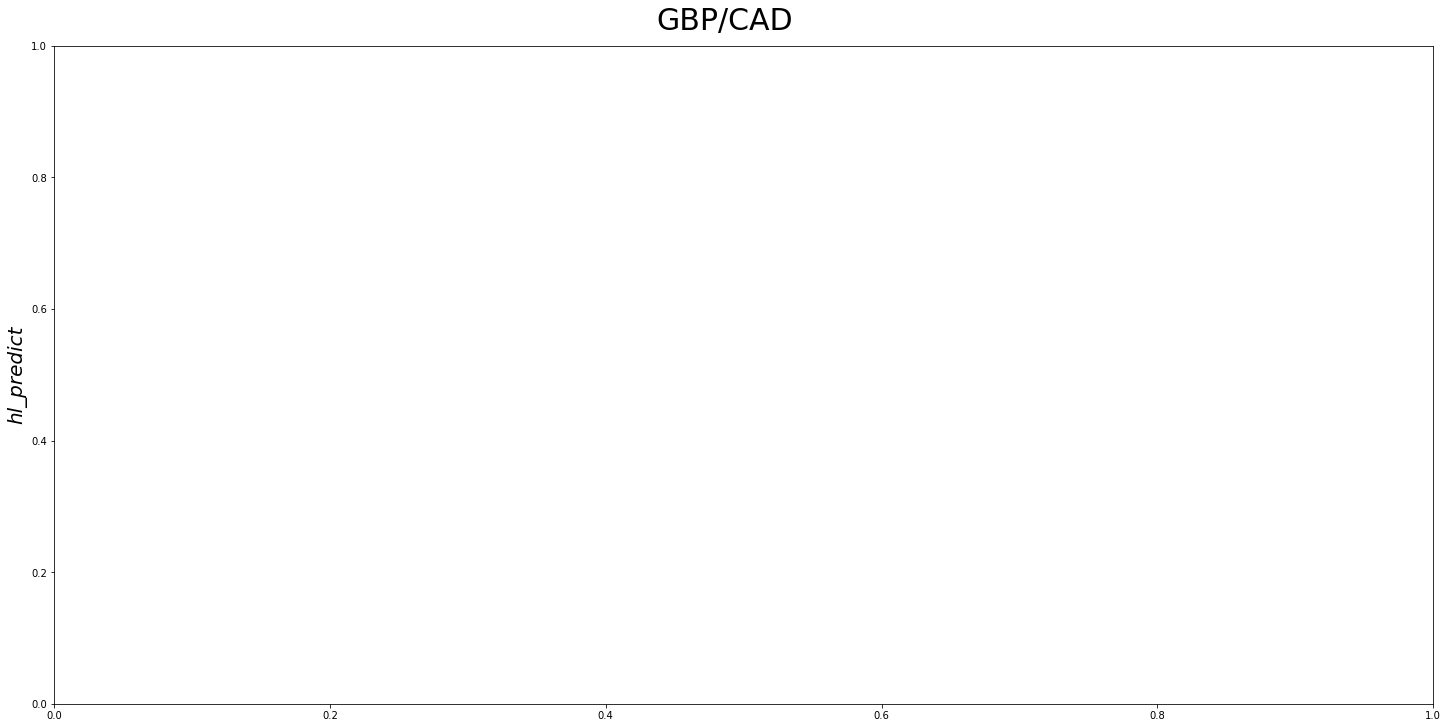

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10), layout='constrained')
fig.suptitle('GBP/CAD', fontsize=30)
ax.set_ylabel('hl_predict',  fontstyle='oblique', fontsize=20)
ax.hlines(df['hl_predict'][0], df.index[-1], df.index[0], color='red')
plt.plot(df['hl_predict'])


In [ ]:
fin_holidays=holidays.financial_holidays('NYSE', years=[2017, 2018, 2019, 2020, 2021, 2022, 2023], observed=True)
df_holidays = pd.DataFrame(fin_holidays.items(), columns=['Date','Holiday'] )
canada_holidays = holidays.Canada(years=[2017, 2018, 2019, 2020, 2021, 2022, 2023], observed=True)
us_holidays = holidays.USA(years=[2017, 2018, 2019, 2020, 2021, 2022, 2023], observed=True)
gb_holidays=holidays.GB(years=[2017, 2018, 2019, 2020, 2021, 2022, 2023], observed=True)
eur_holidays=holidays.ECB(years=[2017, 2018, 2019, 2020, 2021, 2022, 2023], observed=True)
us_holidays_bank=holidays.NYSE(years=[2017, 2018, 2019, 2020, 2021, 2022, 2023], observed=True)
fin_holidays=holidays.financial_holidays('NYSE', years=[2017, 2018, 2019, 2020, 2021, 2022, 2023], observed=True)
# Преобразование в DataFrame
df_holidays_CA = pd.DataFrame(canada_holidays.items(), columns=['Date', 'Holiday'])
df_holidays_usa = pd.DataFrame(us_holidays.items(), columns=['Date', 'Holiday'])
df_holidays_gb = pd.DataFrame(gb_holidays.items(), columns=['Date', 'Holiday'])
df_holidays_ECB = pd.DataFrame(eur_holidays.items(), columns=['Date', 'Holiday'])
df_holidays_NYSE = pd.DataFrame(us_holidays_bank.items(), columns=['Date', 'Holiday'])
df_holidays = pd.DataFrame(fin_holidays.items(), columns=['Date','Holiday'] )

In [ ]:
us_holidays_bank=holidays.NYSE(years=[2017, 2018, 2019, 2020, 2021, 2022, 2023], observed=True)
df_holidays_NYSE = pd.DataFrame(us_holidays_bank.items(), columns=['Date', 'Holiday'])
holidays_US = pd.DataFrame({
  'holiday': 'financial_NYSE',
  'ds': pd.to_datetime(df_holidays_NYSE['Date']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays_US.tail(5)

,holiday,ds,lower_window,upper_window
62,financial_NYSE,2023-06-19,0,1
63,financial_NYSE,2023-07-04,0,1
64,financial_NYSE,2023-09-04,0,1
65,financial_NYSE,2023-11-23,0,1
66,financial_NYSE,2023-12-25,0,1


In [ ]:
model = Prophet(holidays=None, 
                holidays_prior_scale=10, 
                changepoint_range=0.8, 
                changepoint_prior_scale=0.05,
                yearly_seasonality = 'auto',
                weekly_seasonality = 'auto',
                daily_seasonality = 'auto',
                growth = 'linear', 
                n_changepoints = 25,
                changepoints = None,
                seasonality_mode = 'additive', 
                seasonality_prior_scale = 10, 
                mcmc_samples = 0, 
                interval_width = 0.08, 
                uncertainty_samples = 1000,
                stan_backend = None)
                
                
                
# model.add_regressor(regr)
model.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshhnhho0/xcougy24.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshhnhho0/huwnm5p9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66864', 'data', 'file=/tmp/tmpshhnhho0/xcougy24.json', 'init=/tmp/tmpshhnhho0/huwnm5p9.json', 'output', 'file=/tmp/tmpshhnhho0/prophet_modeln1q3hk_e/prophet_model-20230319172734.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:27:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:27:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods=predict_num)
# future['hl_predict']=df['hl_predict']
future.tail(5)


,ds
1445,2023-03-01
1446,2023-03-02
1447,2023-03-03
1448,2023-03-04
1449,2023-03-05


In [ ]:
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-08-03,1.699951,1.654774,1.658644,1.699951,1.699951,-0.044707,-0.044707,-0.044707,0.007853,0.007853,0.007853,-0.052560,-0.052560,-0.052560,0.0,0.0,0.0,1.655245
1,2017-08-04,1.699683,1.652805,1.655816,1.699683,1.699683,-0.045750,-0.045750,-0.045750,0.007321,0.007321,0.007321,-0.053071,-0.053071,-0.053071,0.0,0.0,0.0,1.653932
2,2017-08-07,1.698877,1.649327,1.652422,1.698877,1.698877,-0.048788,-0.048788,-0.048788,0.006419,0.006419,0.006419,-0.055208,-0.055208,-0.055208,0.0,0.0,0.0,1.650089
3,2017-08-08,1.698609,1.647368,1.650785,1.698609,1.698609,-0.049077,-0.049077,-0.049077,0.007012,0.007012,0.007012,-0.056090,-0.056090,-0.056090,0.0,0.0,0.0,1.649531
4,2017-08-09,1.698340,1.647014,1.651032,1.698340,1.698340,-0.049447,-0.049447,-0.049447,0.007590,0.007590,0.007590,-0.057037,-0.057037,-0.057037,0.0,0.0,0.0,1.648894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,2023-03-01,1.565026,1.634924,1.638845,1.565026,1.565026,0.072283,0.072283,0.072283,0.007590,0.007590,0.007590,0.064693,0.064693,0.064693,0.0,0.0,0.0,1.637308
1446,2023-03-02,1.564850,1.636294,1.640332,1.564850,1.564850,0.073035,0.073035,0.073035,0.007853,0.007853,0.007853,0.065181,0.065181,0.065181,0.0,0.0,0.0,1.637885
1447,2023-03-03,1.564674,1.637713,1.640808,1.564674,1.564674,0.072918,0.072918,0.072918,0.007321,0.007321,0.007321,0.065597,0.065597,0.065597,0.0,0.0,0.0,1.637593
1448,2023-03-04,1.564499,1.609768,1.613386,1.564499,1.564499,0.047827,0.047827,0.047827,-0.018098,-0.018098,-0.018098,0.065925,0.065925,0.065925,0.0,0.0,0.0,1.612326


In [ ]:
for i in range(predict_num):
    print(test[mark][i],forecast['yhat'][1449-1],'Ошибка = ',(test[mark][i]-forecast['yhat'][1449-i]))

1.63959 1.6123260507640178 Ошибка =  0.027213891263656587
1.64223 1.6123260507640178 Ошибка =  0.029903949235982275
